# Clustering at the composition scale

In [1]:
#install.packages('rpostgis', 'rgdal', 'magrittr', 'dbscan', 'corrplot')
library('rpostgis')
library('rgdal')
library('magrittr')
library('tidyverse')
library('dbscan')
#library('corrplot')

Warning message:
"package 'rpostgis' was built under R version 3.4.4"Loading required package: RPostgreSQL
Loading required package: DBI
Loading required package: sp
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.0, released 2017/04/28
 Path to GDAL shared files: C:/R/libs/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/R/libs/rgdal/proj
 Linking to sp version: 1.2-5 
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract()   masks magrittr::extract()
x dplyr::filter()    masks stats::filter()
x dplyr::lag()       masks stat

In [2]:
conn <- dbConnect("PostgreSQL", dbname = 'base_data', host = 'localhost', user = 'postgres', password = 'asd')

In [3]:
cp_scale_query <- "SELECT a.geom, a.id, cp_fac_lgt, cp_fac_lgt_rel,
cp_d_nxtbuil, cp_d_builnxtblk, cp_infzn_area, cp_r_ftp_infzon,
cp_d_blklim, cp_blk_area, cp_r_ftp_blk, cp_closeness
FROM public.bd a,
     public.AGGLO b
WHERE ST_Intersects(a.geom, b.geom)
 AND cp_blk_area IS NOT NULL
ORDER BY a.id;"

In [4]:
sub_in_query <- function(gid, agglo, query) {
    q <- gsub('GID', gid, query) %>%
         gsub('AGGLO', agglo, .)
    return(q)
}

In [90]:
cp_stata <- pgGetGeom(conn, query = sub_in_query(0, "stata", cp_scale_query))
row.names(cp_stata@data) <- cp_stata@data$id
cp_stata@data$id <- NULL 
cp_stata@data <- data.frame(scale(cp_stata@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [81]:
cp_statb <- pgGetGeom(conn, query = sub_in_query(0, "statb", cp_scale_query))
row.names(cp_statb@data) <- cp_statb@data$id
cp_statb@data$id <- NULL 
cp_statb@data <- data.frame(scale(cp_statb@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [58]:
cp_morf <- pgGetGeom(conn, query = sub_in_query(0, "morfrac", cp_scale_query))
row.names(cp_morf@data) <- cp_morf@data$id
cp_morf@data$id <- NULL 
cp_morf@data <- data.frame(scale(cp_morf@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [59]:
cp_ccak <- pgGetGeom(conn, query = sub_in_query(0, "cca_king", cp_scale_query))
row.names(cp_ccak@data) <- cp_ccak@data$id
cp_ccak@data$id <- NULL 
cp_ccak@data <- data.frame(scale(cp_ccak@data))

Returning MultiPolygon types in SpatialPolygons*-class.


In [139]:
cp_ccal <- pgGetGeom(conn, query = sub_in_query(0, "cca_lenient", cp_scale_query))
row.names(cp_ccal@data) <- cp_ccal@data$id
cp_ccal@data$id <- NULL 
cp_ccal@data <- data.frame(scale(cp_ccal@data))

Returning MultiPolygon types in SpatialPolygons*-class.


### StatA

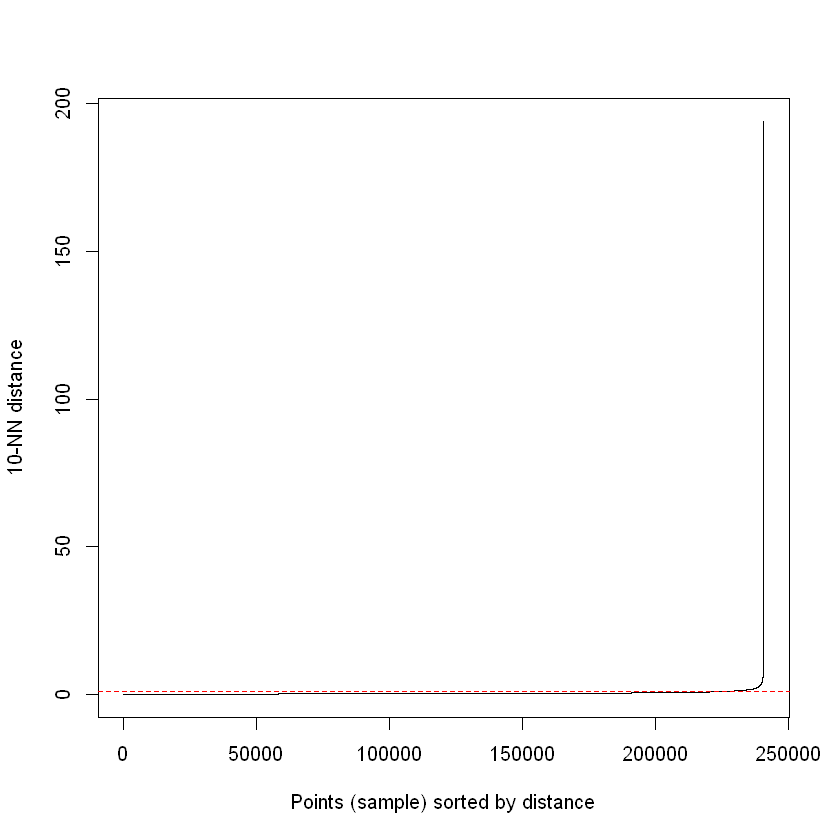

In [14]:
kNNdistplot(cp_stata@data, k = 10)
abline(h = 1.2, col = 'red', lty = 2)

In [91]:
res_stata <- dbscan(cp_stata@data, eps = 1.2, minPts = 11)
res_stata

DBSCAN clustering for 24088 objects.
Parameters: eps = 1.2, minPts = 11
The clustering contains 1 cluster(s) and 1136 noise points.

    0     1 
 1136 22952 

Available fields: cluster, eps, minPts

In [92]:
clusDBSCAN <- res_stata$cluster
cp_stata@data <- cbind(cp_stata@data, clusDBSCAN)
head(cp_stata@data)

,cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN
788,-0.03509904,-0.4359901,-0.03324917,-0.6395944,-0.21329750,0.1118451,-0.6493896,-0.6362676,0.10520264,-0.09328914,1
789,-0.03509904,-0.4359901,-0.42860698,-0.2170841,-0.28551881,0.4014924,0.8563991,-0.6975794,0.08368704,-0.09328914,1
790,-0.03509904,-0.4359901,0.33751440,-0.5871980,0.21185810,1.5509413,-0.4333021,-0.4183293,1.02567924,-0.09328914,1
791,-0.03509904,-0.4359901,-0.50135643,-0.5672683,-0.27960492,2.1131247,-0.1101535,-0.7170387,1.00096397,-0.09328914,1
792,-0.03509904,-0.4359901,-0.56382256,-0.7225234,-0.07829464,1.4894474,-0.5458720,-0.5465504,0.66780308,-0.09328914,1
793,0.09958517,1.9224147,-0.47540884,-0.7979580,-0.27531017,2.6818850,-0.8017178,-0.7074990,1.01533289,0.54423766,1


In [93]:
sel <- cp_stata@data$clusDBSCAN == 1
cp_stata_to_class <- cp_stata[sel,]

In [17]:
head(cp_stata_to_class@data)

,cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN
788,-0.03509904,-0.4359901,-0.03324917,-0.6395944,-0.21329750,0.1118451,-0.6493896,-0.6362676,0.10520264,-0.09328914,1
789,-0.03509904,-0.4359901,-0.42860698,-0.2170841,-0.28551881,0.4014924,0.8563991,-0.6975794,0.08368704,-0.09328914,1
790,-0.03509904,-0.4359901,0.33751440,-0.5871980,0.21185810,1.5509413,-0.4333021,-0.4183293,1.02567924,-0.09328914,1
791,-0.03509904,-0.4359901,-0.50135643,-0.5672683,-0.27960492,2.1131247,-0.1101535,-0.7170387,1.00096397,-0.09328914,1
792,-0.03509904,-0.4359901,-0.56382256,-0.7225234,-0.07829464,1.4894474,-0.5458720,-0.5465504,0.66780308,-0.09328914,1
793,0.09958517,1.9224147,-0.47540884,-0.7979580,-0.27531017,2.6818850,-0.8017178,-0.7074990,1.01533289,0.54423766,1


In [101]:
wss_clusters = seq(1, 30)
for (i in 1:30) {
    c = kmeans(cp_stata_to_class@data[, c(1:10)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1147600)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1147600)"

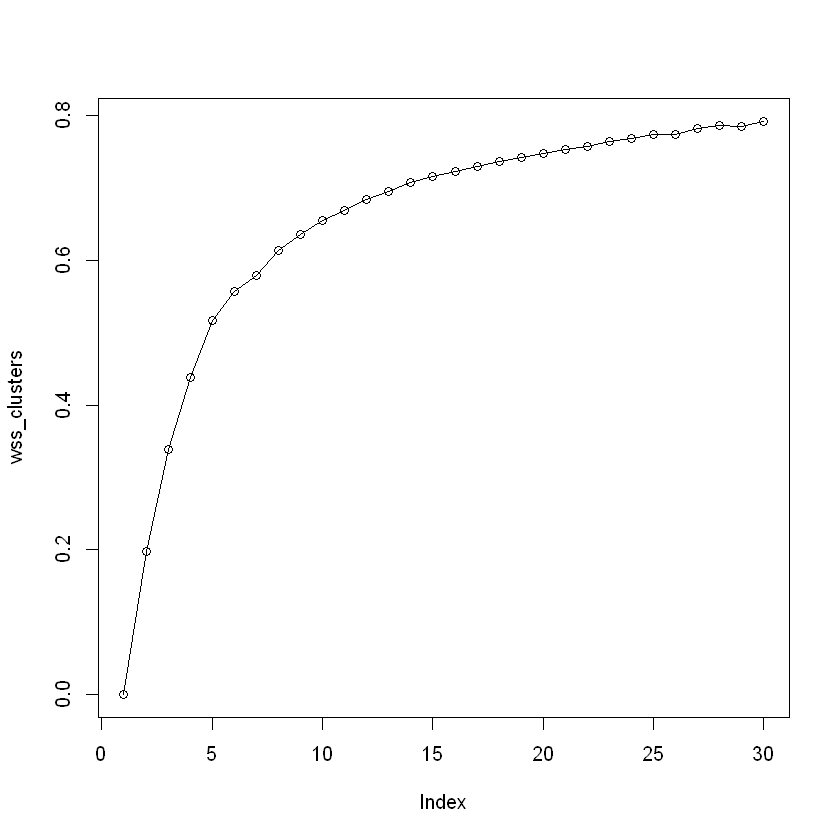

In [102]:
plot(wss_clusters, type="o")

In [104]:
stata_kmeans <- kmeans(cp_stata_to_class@data[, -11], 14, nstart = 5, iter.max = 50)

In [105]:
round(stata_kmeans$betweenss / stata_kmeans$totss, 2)

[1] 0.71

In [106]:
clusKME14 <- stata_kmeans$cluster
cp_stata_to_class@data <- cbind(cp_stata_to_class@data, clusKME14)

In [122]:
writeOGR(cp_stata, dsn = "cp_stata.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(cp_stata_to_class, dsn = "cp_stata_kmeans.gpkg", layer = 'km14', driver = "GPKG")

### StatB

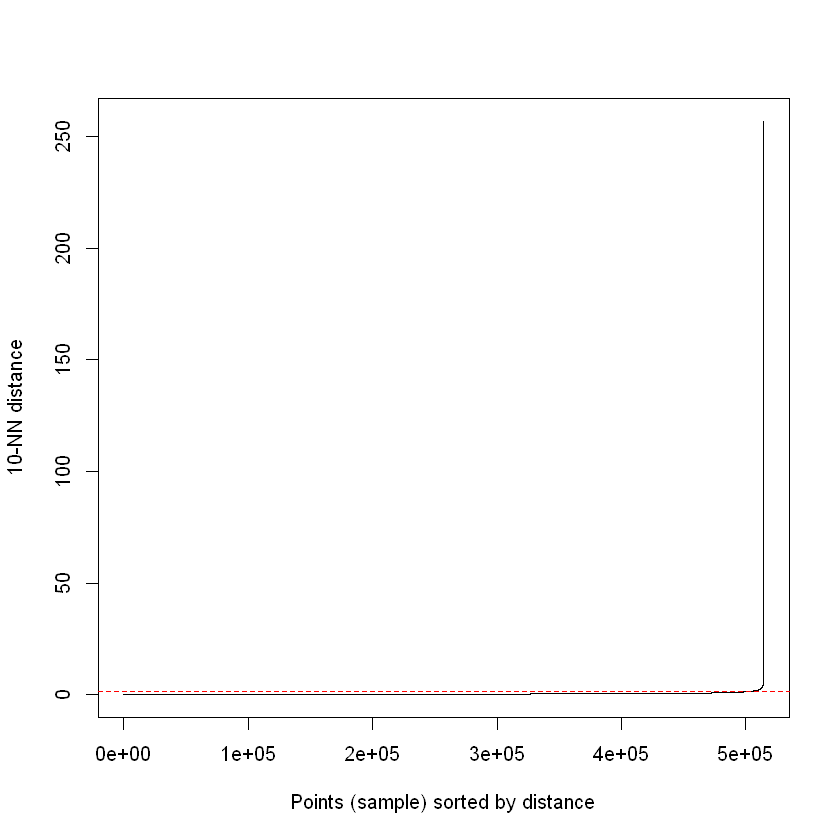

In [63]:
kNNdistplot(cp_statb@data, k = 10)
abline(h = 1.2, col = 'red', lty = 2)

In [82]:
res_statb <- dbscan(cp_statb@data[, c(1:10)], eps = 1.3, minPts = 11)
res_statb

DBSCAN clustering for 51463 objects.
Parameters: eps = 1.3, minPts = 11
The clustering contains 3 cluster(s) and 1286 noise points.

    0     1     2     3 
 1286 50149    18    10 

Available fields: cluster, eps, minPts

In [83]:
clusDBSCAN <- res_statb$cluster
cp_statb@data <- cbind(cp_statb@data, clusDBSCAN)
head(cp_statb@data)

cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN
-0.05119042,-0.4690595,-0.35551294,1.3403854,0.65233073,-0.8402341,-0.5689737,0.01188065,-0.1578895,-0.121135745,1
-0.05119042,-0.4690595,-0.38834594,-0.1898835,0.07418852,-1.1396473,-0.2383441,0.01188065,-0.2953108,-0.121135745,1
0.10495345,1.4899198,-0.05678533,-0.3365522,-0.17717983,-0.8425719,-0.6748702,-0.02785926,-0.2721259,0.001823016,1
0.09905715,0.7446541,-0.33932090,0.1984938,-0.12107912,-0.6818775,-0.7505079,-0.02785926,-0.2452814,-0.002820478,1
-0.05119042,-0.4690595,-0.14184117,-0.6464805,0.61002909,-1.1220213,-0.3667761,0.10619752,-0.2834150,-0.121135745,1
-0.05119042,-0.4690595,-0.24617669,-0.1835696,0.92304132,-1.1457780,1.9110478,-0.02785926,-0.2852886,-0.121135745,1


In [84]:
sel <- cp_statb@data$clusDBSCAN == 1
cp_statb_to_class <- cp_statb[sel,]

In [72]:
head(cp_statb_to_class@data)

cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN,clusDBSCAN.1
-0.05119042,-0.4690595,-0.35551294,1.3403854,0.65233073,-0.8402341,-0.5689737,0.01188065,-0.1578895,-0.121135745,1,1
-0.05119042,-0.4690595,-0.38834594,-0.1898835,0.07418852,-1.1396473,-0.2383441,0.01188065,-0.2953108,-0.121135745,1,1
0.10495345,1.4899198,-0.05678533,-0.3365522,-0.17717983,-0.8425719,-0.6748702,-0.02785926,-0.2721259,0.001823016,1,1
0.09905715,0.7446541,-0.33932090,0.1984938,-0.12107912,-0.6818775,-0.7505079,-0.02785926,-0.2452814,-0.002820478,1,1
-0.05119042,-0.4690595,-0.14184117,-0.6464805,0.61002909,-1.1220213,-0.3667761,0.10619752,-0.2834150,-0.121135745,1,1
-0.05119042,-0.4690595,-0.24617669,-0.1835696,0.92304132,-1.1457780,1.9110478,-0.02785926,-0.2852886,-0.121135745,1,1


In [85]:
wss_clusters = seq(1, 30)
for (i in 1:30) {
    c = kmeans(cp_statb_to_class@data[, c(1:10)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 2507450)"Warning message:
"Quick-TRANSfer stage

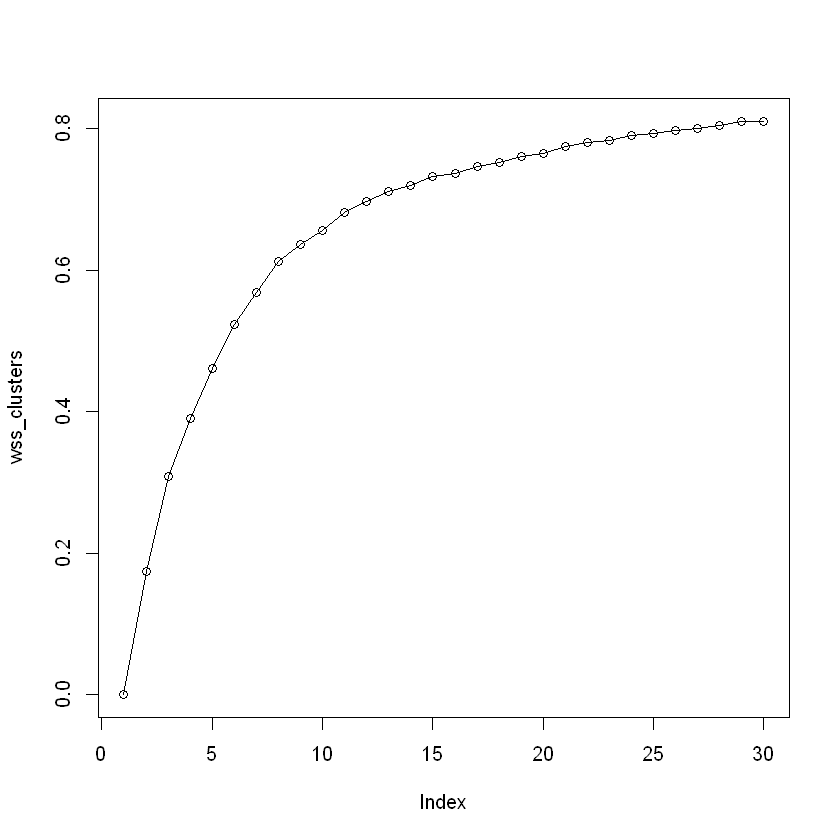

In [86]:
plot(wss_clusters, type="o")

In [87]:
statb_kmeans <- kmeans(cp_statb_to_class@data[, c(1:10)], 15, nstart = 5, iter.max = 50)

In [88]:
round(statb_kmeans$betweenss / statb_kmeans$totss, 2)

[1] 0.73

In [98]:
clusKME22 <- statb_kmeans$cluster
cp_statb_to_class@data <- cbind(cp_statb_to_class@data, clusKME22)

In [121]:
writeOGR(cp_statb, dsn = "cp_statb.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(cp_statb_to_class, dsn = "cp_statb_kmeans.gpkg", layer = 'km15', driver = "GPKG")

### Fractal morphology

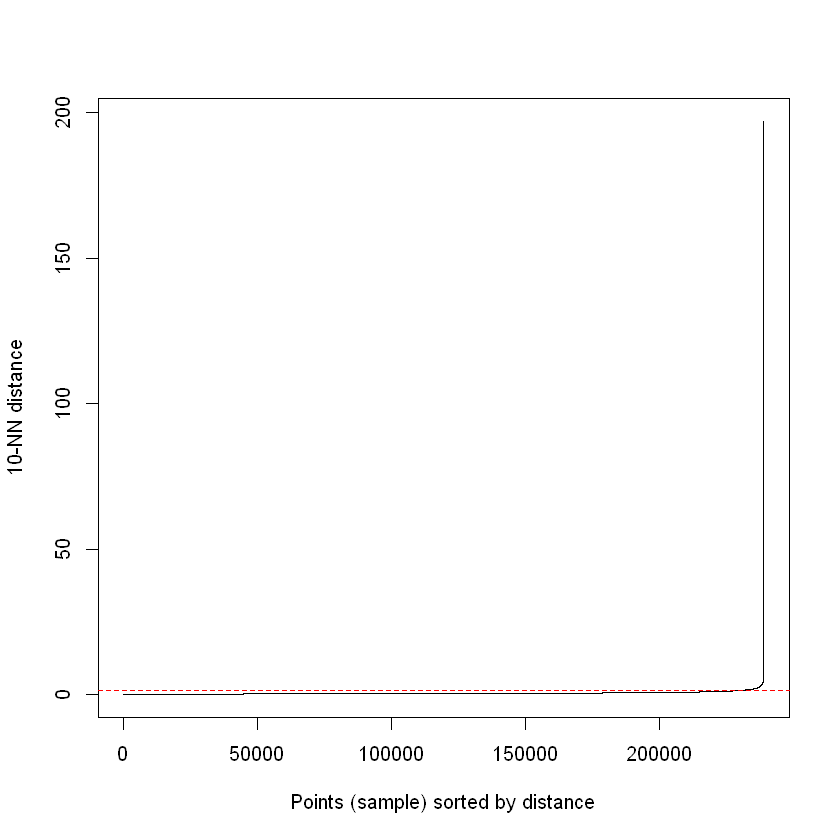

In [109]:
kNNdistplot(cp_morf@data, k = 10)
abline(h = 1.3, col = 'red', lty = 2)

In [110]:
res_morf <- dbscan(cp_morf@data[, c(1:10)], eps = 1.3, minPts = 11)
res_morf

DBSCAN clustering for 23917 objects.
Parameters: eps = 1.3, minPts = 11
The clustering contains 1 cluster(s) and 1037 noise points.

    0     1 
 1037 22880 

Available fields: cluster, eps, minPts

In [111]:
clusDBSCAN <- res_morf$cluster
cp_morf@data <- cbind(cp_morf@data, clusDBSCAN)
head(cp_morf@data)

,cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN
788,-0.03468567,-0.4381127,0.02865119,-0.7245414,-0.19941546,0.0839235,-0.6539708,-0.6589493,0.1008870,-0.09793217,1
789,-0.03468567,-0.4381127,-0.72103853,-0.1773595,-0.31704607,0.3777040,0.8891179,-0.7306279,0.0793774,-0.09793217,1
790,-0.03468567,-0.4381127,0.73170456,-0.6566843,0.49305758,1.5435551,-0.4325306,-0.4041613,1.0211087,-0.09793217,1
791,-0.03468567,-0.4381127,-0.85898829,-0.6308738,-0.30741382,2.1137607,-0.1013773,-0.7533774,0.9964002,-0.09793217,1
792,-0.03468567,-0.4381127,-0.97743850,-0.8319406,0.02047072,1.4811837,-0.5478890,-0.5540624,0.6633316,-0.09793217,1
793,0.10103925,1.9220413,-0.80978567,-0.9296340,-0.30041873,2.6906370,-0.8100723,-0.7422247,1.0107652,0.55478933,1


In [112]:
sel <- cp_morf@data$clusDBSCAN == 1
cp_morf_to_class <- cp_morf[sel,]

In [72]:
head(cp_statb_to_class@data)

cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN,clusDBSCAN.1
-0.05119042,-0.4690595,-0.35551294,1.3403854,0.65233073,-0.8402341,-0.5689737,0.01188065,-0.1578895,-0.121135745,1,1
-0.05119042,-0.4690595,-0.38834594,-0.1898835,0.07418852,-1.1396473,-0.2383441,0.01188065,-0.2953108,-0.121135745,1,1
0.10495345,1.4899198,-0.05678533,-0.3365522,-0.17717983,-0.8425719,-0.6748702,-0.02785926,-0.2721259,0.001823016,1,1
0.09905715,0.7446541,-0.33932090,0.1984938,-0.12107912,-0.6818775,-0.7505079,-0.02785926,-0.2452814,-0.002820478,1,1
-0.05119042,-0.4690595,-0.14184117,-0.6464805,0.61002909,-1.1220213,-0.3667761,0.10619752,-0.2834150,-0.121135745,1,1
-0.05119042,-0.4690595,-0.24617669,-0.1835696,0.92304132,-1.1457780,1.9110478,-0.02785926,-0.2852886,-0.121135745,1,1


In [113]:
wss_clusters = seq(1, 30)
for (i in 1:30) {
    c = kmeans(cp_morf_to_class@data[, c(1:10)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 1144000)"

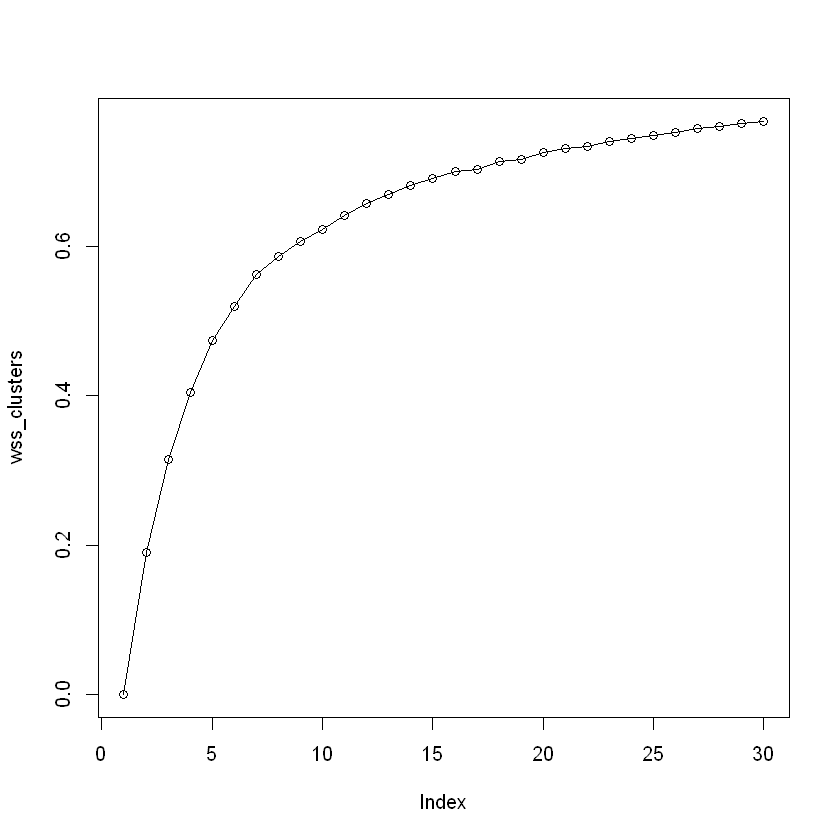

In [114]:
plot(wss_clusters, type="o")

In [115]:
morf_kmeans <- kmeans(cp_morf_to_class@data[, c(1:10)], 16, nstart = 5, iter.max = 50)

In [116]:
round(morf_kmeans$betweenss / morf_kmeans$totss, 2)

[1] 0.69

In [117]:
clusKME16 <- morf_kmeans$cluster
cp_morf_to_class@data <- cbind(cp_morf_to_class@data, clusKME16)

In [120]:
writeOGR(cp_morf, dsn = "cp_morf.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(cp_morf_to_class, dsn = "cp_morf_kmeans.gpkg", layer = 'km16', driver = "GPKG")

### CCA King

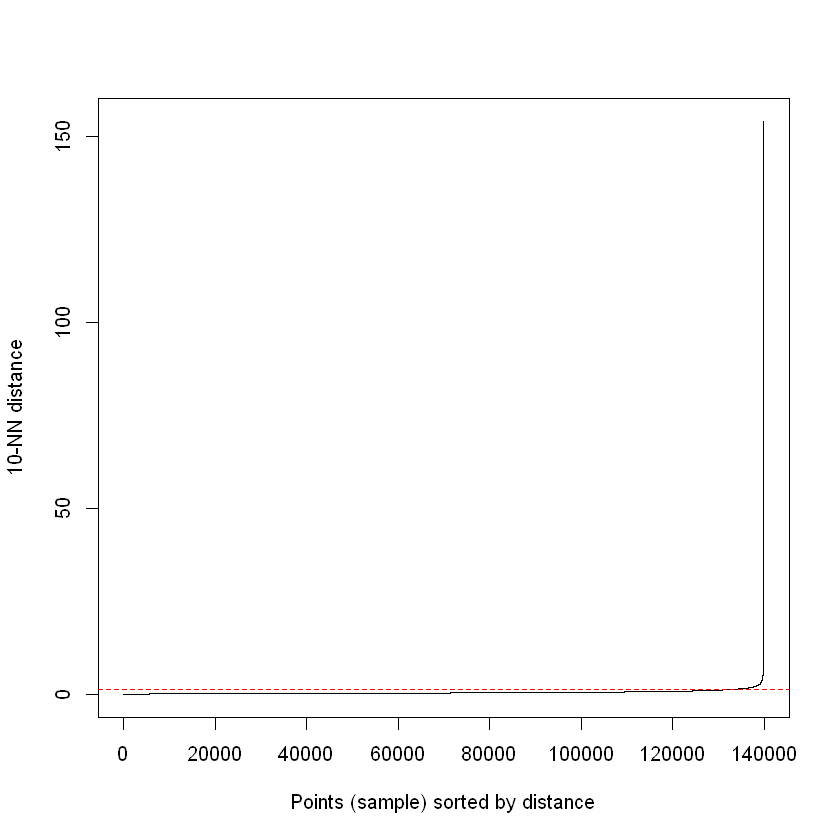

In [123]:
kNNdistplot(cp_ccak@data, k = 10)
abline(h = 1.3, col = 'red', lty = 2)

In [125]:
res_ccak <- dbscan(cp_ccak@data[, c(1:10)], eps = 1.3, minPts = 11)
res_ccak

DBSCAN clustering for 13990 objects.
Parameters: eps = 1.3, minPts = 11
The clustering contains 1 cluster(s) and 743 noise points.

    0     1 
  743 13247 

Available fields: cluster, eps, minPts

In [126]:
clusDBSCAN <- res_ccak$cluster
cp_ccak@data <- cbind(cp_ccak@data, clusDBSCAN)
head(cp_ccak@data)

,cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN
788,-0.03310681,-0.4440339,0.2332944,-0.7078693,-0.1320889,-0.19334868,-0.63651504,-0.6323096,0.025558722,-0.09532425,1
789,-0.03310681,-0.4440339,-0.8251730,0.0155130,-0.3465585,0.09872696,0.97533040,-0.7227588,0.006260403,-0.09532425,1
790,-0.03310681,-0.4440339,1.2259171,-0.6181612,1.1304604,1.25781254,-0.40520791,-0.3108001,0.851175847,-0.09532425,1
791,-0.03310681,-0.4440339,-1.0199407,-0.5840393,-0.3289965,1.82470909,-0.05929914,-0.7514657,0.829007605,-0.09532425,1
792,-0.03310681,-0.4440339,-1.1871774,-0.8498526,0.2688179,1.19580307,-0.52570649,-0.4999559,0.530180522,-0.09532425,1
793,0.07081472,1.8235336,-0.9504728,-0.9790046,-0.3162427,2.39823772,-0.79957210,-0.7373925,0.841895741,0.42153289,1


In [127]:
sel <- cp_ccak@data$clusDBSCAN == 1
cp_ccak_to_class <- cp_ccak[sel,]

In [129]:
wss_clusters = seq(1, 30)
for (i in 1:30) {
    c = kmeans(cp_ccak_to_class@data[, c(1:10)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 662350)"

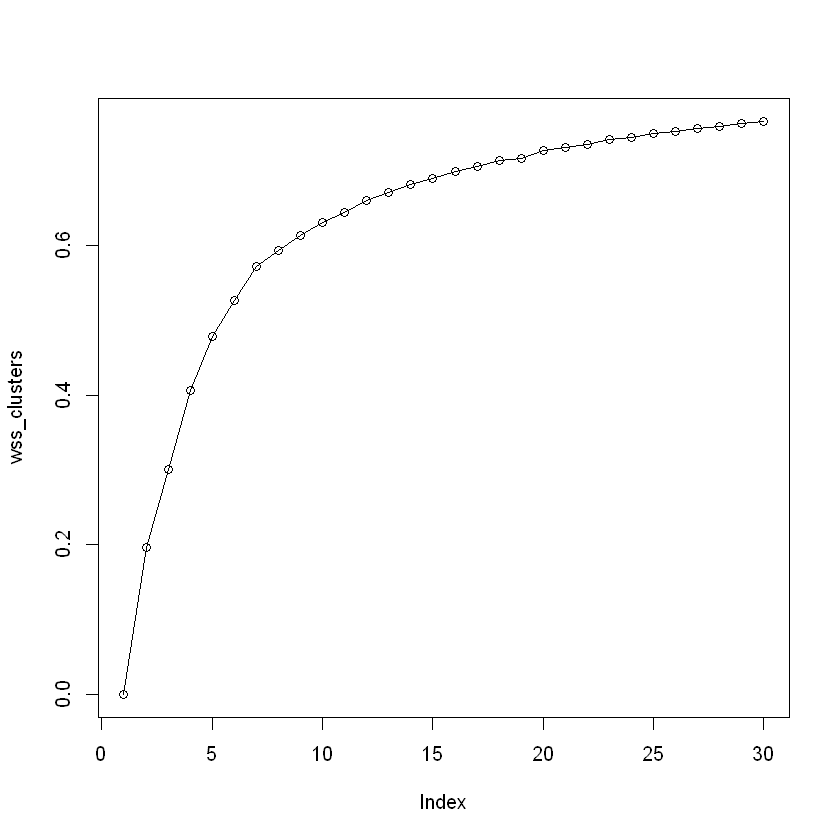

In [130]:
plot(wss_clusters, type="o")

In [131]:
ccak_kmeans <- kmeans(cp_ccak_to_class@data[, c(1:10)], 18, nstart = 5, iter.max = 50)

In [132]:
round(ccak_kmeans$betweenss / ccak_kmeans$totss, 2)

[1] 0.71

In [133]:
clusKME18 <- ccak_kmeans$cluster
cp_ccak_to_class@data <- cbind(cp_ccak_to_class@data, clusKME18)

In [134]:
writeOGR(cp_ccak, dsn = "cp_ccak.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(cp_ccak_to_class, dsn = "cp_ccak_kmeans.gpkg", layer = 'km18', driver = "GPKG")

### CCA Lenient

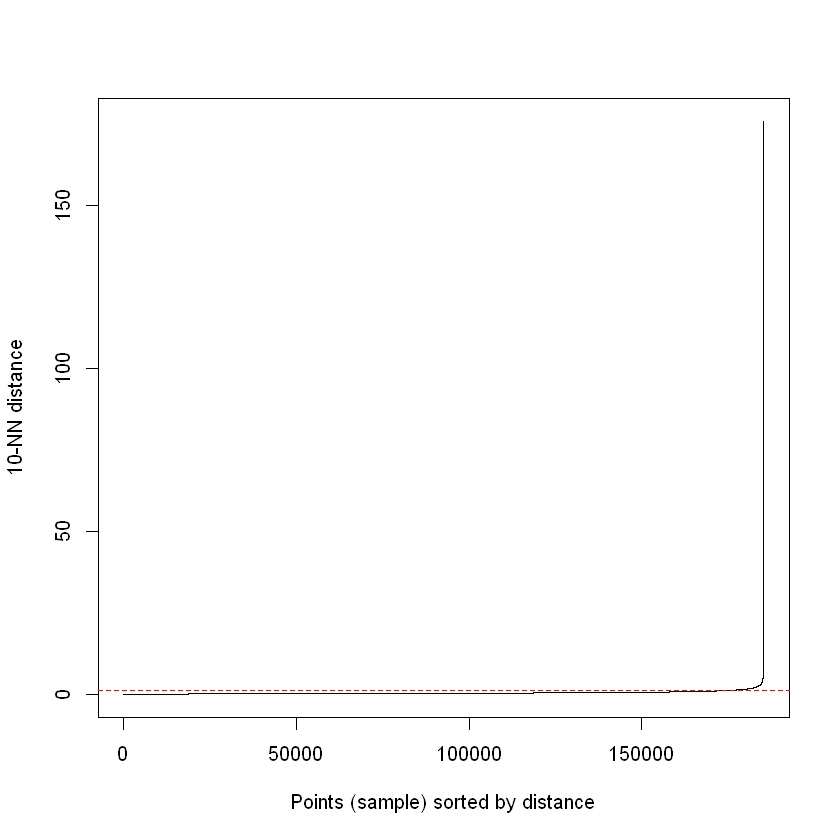

In [140]:
kNNdistplot(cp_ccal@data, k = 10)
abline(h = 1.3, col = 'red', lty = 2)

In [141]:
res_ccal <- dbscan(cp_ccal@data[, c(1:10)], eps = 1.3, minPts = 11)
res_ccal

DBSCAN clustering for 18538 objects.
Parameters: eps = 1.3, minPts = 11
The clustering contains 1 cluster(s) and 896 noise points.

    0     1 
  896 17642 

Available fields: cluster, eps, minPts

In [143]:
clusDBSCAN <- res_ccal$cluster
cp_ccal@data <- cbind(cp_ccal@data, clusDBSCAN)
head(cp_ccal@data)

,cp_fac_lgt,cp_fac_lgt_rel,cp_d_nxtbuil,cp_d_builnxtblk,cp_infzn_area,cp_r_ftp_infzon,cp_d_blklim,cp_blk_area,cp_r_ftp_blk,cp_closeness,clusDBSCAN
788,-0.03406541,-0.445852,0.1937930,-0.6919010,-0.1582695,-0.1099506,-0.6430918,-0.6455315,0.05049763,-0.09783788,1
789,-0.03406541,-0.445852,-0.8330146,-0.0719889,-0.3368553,0.1883535,0.9806330,-0.7277722,0.03055439,-0.09783788,1
790,-0.03406541,-0.445852,1.1567254,-0.6150244,0.8930373,1.3721564,-0.4100799,-0.3531997,0.90370546,-0.09783788,1
791,-0.03406541,-0.445852,-1.0219565,-0.5857832,-0.3222317,1.9511420,-0.0616218,-0.7538739,0.88079639,-0.09783788,1
792,-0.03406541,-0.445852,-1.1841911,-0.8135754,0.1755599,1.3088246,-0.5314666,-0.5251892,0.57198302,-0.09783788,1
793,0.08549297,1.884075,-0.9545665,-0.9242540,-0.3116118,2.5369011,-0.8073506,-0.7410779,0.89411523,0.48877281,1


In [144]:
sel <- cp_ccal@data$clusDBSCAN == 1
cp_ccal_to_class <- cp_ccal[sel,]

In [145]:
wss_clusters = seq(1, 30)
for (i in 1:30) {
    c = kmeans(cp_ccal_to_class@data[, c(1:10)], i, nstart=5, iter.max = 50)
    wss_clusters[i] = c$betweenss / c$totss
}

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 882100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 882100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 882100)"Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 882100)"

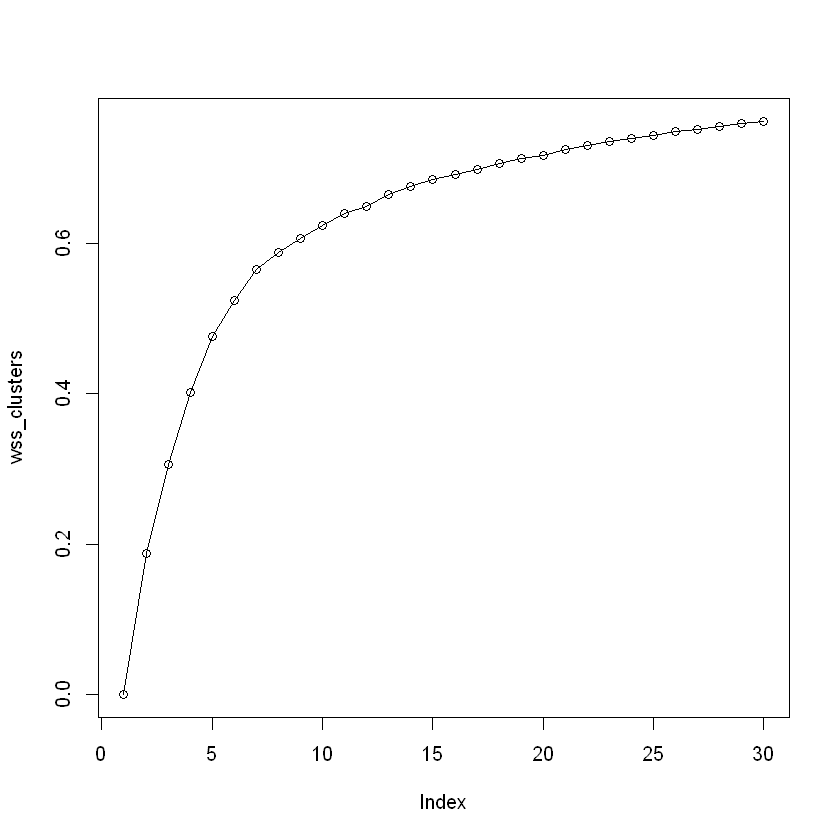

In [146]:
plot(wss_clusters, type="o")

In [147]:
ccal_kmeans <- kmeans(cp_ccal_to_class@data[, c(1:10)], 19, nstart = 5, iter.max = 50)

In [148]:
round(ccal_kmeans$betweenss / ccal_kmeans$totss, 2)

[1] 0.71

In [149]:
clusKME19 <- ccal_kmeans$cluster
cp_ccal_to_class@data <- cbind(cp_ccal_to_class@data, clusKME19)

In [150]:
writeOGR(cp_ccal, dsn = "cp_ccal.gpkg", layer = 'dbscan', driver = "GPKG")
writeOGR(cp_ccal_to_class, dsn = "cp_ccal_kmeans.gpkg", layer = 'km19', driver = "GPKG")